In [1]:
# Author:       Deepta Adhikary
# Date Created: 23-Jan-2023
# Email:        deeptoadhikary@gmail.com

# Univariate Linear Regression

"The line of best fit."

In [2]:
import numpy as np
import numpy.random as rn
import matplotlib.pyplot as plt
%matplotlib inline

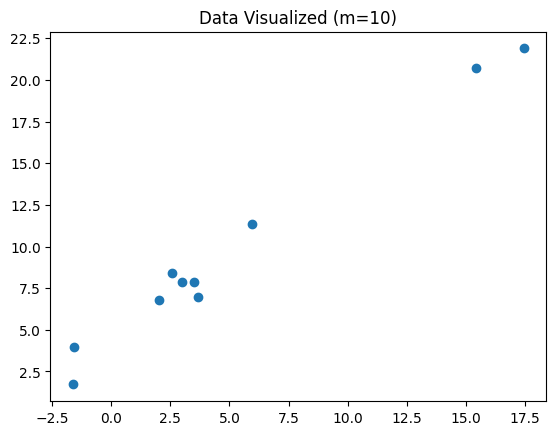

In [3]:
m = 10 # sample size
noise_sd = 0.8 # noise standard dev

X = rn.normal(5, 5, m)
# Y = (X + 5) + random_noise
noise = rn.normal(0, noise_sd, m)
Y = (X + 5) + noise

# plot data
fig, ax = plt.subplots()
ax.scatter(X, Y);
ax.set_title(f'Data Visualized (m={m})');

A linear regression model is defined as $\hat{y} = wx + b$. A possible model is $\hat{y} = 10$ where $w=0$ and $b=10$. This model is illustrated below with the orange line.

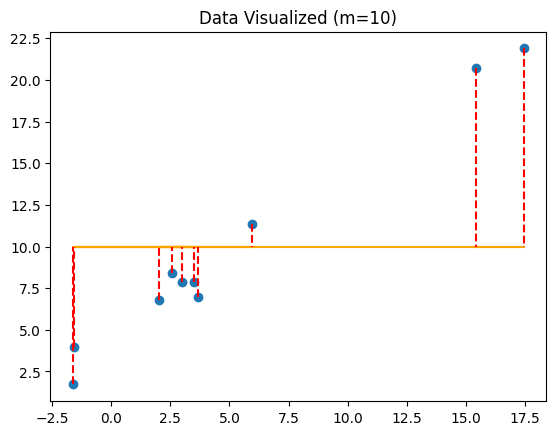

In [4]:
y_hat = [10 for _ in range(m)]
ax.plot(X, y_hat, c='orange')

# plot the losses
for x, yi, yi_hat in zip(X, Y, y_hat):
    ax.plot([x, x], [yi, yi_hat], c='r', linestyle='--')

fig

In this case the loss function, $L(y^{(i)} , \hat{y}^{(i)}) = (y^{(i)} - \hat{y}^{(i)})^2$ by squaring the difference between the actual value $y^{(i)}$ and the predicted value $\hat{y}^{(i)}$.

Using the loss function we can define a cost function, $J$, which when optimized will result in the best fitting model to our data.

$$
\begin{equation} \label{eq1}
\begin{split}
J(w, b) & = \frac{1}{2m} \sum_{i=1}^{m}  L(y^{(i)} , \hat{y}^{(i)}) \\
 & = \frac{1}{2m} \sum_{i=1}^{m} (y^{(i)} - (wx^{(i)} + b))^2
\end{split}
\end{equation}
$$

Below we calculate the Cost function of the model $(w=0, b=10)$

In [5]:
def J(w, b):
    y_hat = (w * X + b)
    loss = (Y - y_hat)**2
    return 1 / (2 * m) * loss.sum()

print(f'J(0, 10) = {J(0, 10) :.4f}')

J(0, 10) = 19.6720


Below we will explore 2 approaches to optimize the cost function (find the minimal cost).

- Approach 1: Gradient Descent
- Approach 2: Normal Equation

## Gradient Descent

Gradient descent is a hill climing, or in this case "hill descending", problem. The goal is to reach the maximum or minimum by taking little steps until the search criteria is met. Using gradient descent we can find the $w$ and $b$ that minimizes the cost function ($J$). Below we plot a 3d graph showing the cost corresponding to various $w$ and $b$ values.

Optimal cost function is J(1.00, 4.70) = 0.3450



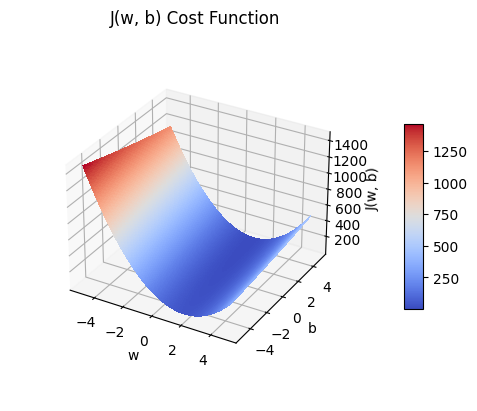

In [6]:
from matplotlib import cm

step = 0.05

fig_3d, ax_3d = plt.subplots(subplot_kw={'projection':'3d'})

Ws = np.arange(-5, 5, step)
Bs = np.arange(-5, 5, step)

W, B = np.meshgrid(Ws, Bs)
Js = np.array([np.array([J(w, b) for w in Ws]) for b in Bs])

surf = ax_3d.plot_surface(W, B, Js, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig_3d.colorbar(surf, shrink=0.5, aspect=10)

ax_3d.set_xlabel('w')
ax_3d.set_ylabel('b')
ax_3d.set_zlabel('J(w, b)')
ax_3d.set_box_aspect((4, 4, 3), zoom=0.8)

ax_3d.set_title(f'J(w, b) Cost Function');

#finding the minimum cost
minJ = min(Js.flatten())
mask = np.where(Js == minJ)
best_w = W[mask][0]
best_b = B[mask][0]

print(f'Optimal cost function is J({best_w :.2f}, {best_b :.2f}) = {minJ :.4f}\n')

## Normal Equation

Since gradient descent is a costly algorithm, in lieu of that we can use a normal equation to directly find the optimal value for $w$ and $b$ that minimizes the cost.

$$
w = \frac{\sum(x^{(i)} - \bar{x})(y^{(i)} - \bar{y})}{\sum(x^{(i)} - \bar{x})^2} \\
b = \bar{y} - w\bar{x}
$$

Where, $\bar{x}$ and $\bar{y}$ are the the mean of X and Y respectively.

In [7]:
def argminJ(X, Y):
    w = ((X - X.mean()) * (Y - Y.mean())).sum() / ((X - X.mean())**2).sum()
    b = Y.mean() - w * X.mean()
    
    return w, b

best_w, best_b = argminJ(X, Y)

print(f'Optimal cost function is J({best_w :.2f}, {best_b :.2f}) = {J(best_w, best_b) :.4f}\n')

Optimal cost function is J(1.01, 4.65) = 0.3409



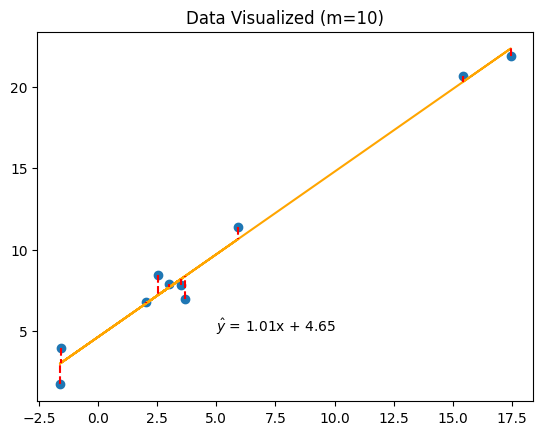

In [8]:
fig, ax = plt.subplots()
ax.scatter(X, Y);
ax.set_title(f'Data Visualized (m={m})');

y_hat = best_w * X + best_b
ax.plot(X, y_hat, c='orange')

ax.annotate(text = r'$\hat{y}$'+ f' = {best_w :.2f}x + {best_b :.2f}', xy=(5, 5))

# plot the losses
for x, yi, yi_hat in zip(X, Y, y_hat):
    ax.plot([x, x], [yi, yi_hat], c='r', linestyle='--')

# Multiple Linear Regression

In univariate linear regression, we were interested in only one input variable $x$. Multiple Linear Regression allows use to model $y$ using more than one input, namely $(x_1, x_2, \dots, x_n)$. Multiple Linear Regression is a bit harder to visualize and it is more abstract. However the general idea is the same but extrapolated over a higher dimension.

Instead of solving for a single pair of $w$ and $b$, we need to solve a system of linear equations using linear algebra.

$$
\hat{y} = w_1x_1 + w_2x_2 + \dots + w_nx_n + b
$$

Expanding this in to matrix form gives us,

$$
\begin{bmatrix}
    \hat{y}_1 \\
    \hat{y}_2 \\
    \vdots \\
    \hat{y}_n
\end{bmatrix}
=
\begin{bmatrix}
    x_{11} & x_{12} & x_{13} & \dots  & x_{1n} & 1 \\
    x_{21} & x_{22} & x_{23} & \dots  & x_{2n} & 1 \\
    \vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
    x_{n1} & x_{n2} & x_{n3} & \dots  & x_{nn} & 1
\end{bmatrix}
\begin{bmatrix}
    w_1 \\
    \vdots \\
    w_n \\
    b
\end{bmatrix}
$$

or,

$$
\vec{Y} = X\beta
$$

The above system can be solved by a normal equation aswell, although this is computaionally expensive because of the matrix inversion ($A^{-1}$).

$$
\beta = (X^TX)^{-1}(X^TY)
$$

# Polynomial Regression

Using Multiple Linear Regression and a little bit of creativity we can model outputs which do not have a linear relationship with the input.

$$
\hat{y} = w_1x + w_2x^2 + w_3\sqrt{x} + b
$$

Here instead of $(x_1, x_2, x_3)$ we have manipulated the inputs inorder to encode the desired polynomial characteristic, namely $(x, x^2, \sqrt{x})$.

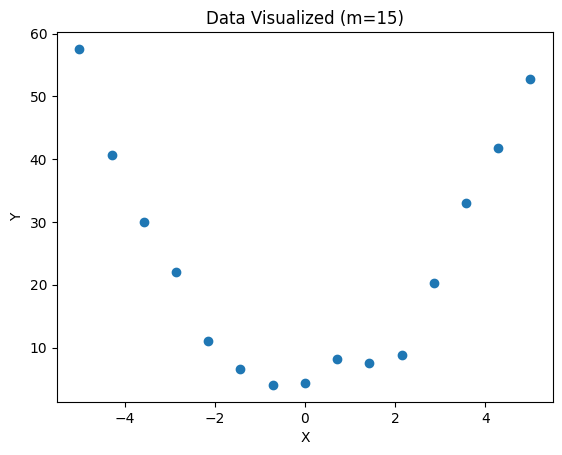

In [9]:
m = 15 # sample size
noise_sd = 1.5 # noise standard dev

X = np.linspace(-5, 5, m)
# Y = (2X^2 + 3) + random_noise
noise = rn.normal(1, noise_sd, m)
Y = (2*X**2 + 3) + noise

# plot data
fig, ax = plt.subplots()
ax.scatter(X, Y);
ax.set_title(f'Data Visualized (m={m})');
ax.set_xlabel('X')
ax.set_ylabel('Y');

In the above figure we plotted $X$ vs $Y$ which reveals the polynomial nature of the relationship. In order to make this data suitable for linear regression we can simply consider the relationship between $X^2$ and $Y$ as shown below.

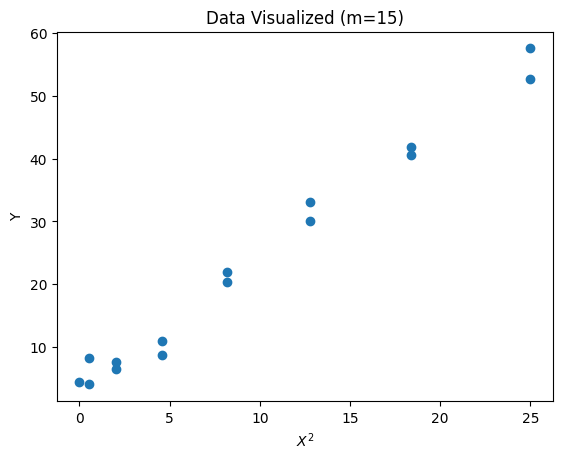

In [10]:
fig, ax = plt.subplots()
ax.scatter(X**2, Y);
ax.set_title(f'Data Visualized (m={m})');
ax.set_xlabel(r'$X^2$')
ax.set_ylabel('Y');

By doing this we are looking for models that are like $\hat{y} = w_1x^2 + b$. Note, that nothing is stopping us from choosing another polynomial function such as $\hat{y} = w_1\sqrt{x} + b$.

Using the very same normal equation we can find the optimal value for $w$ and $b$.

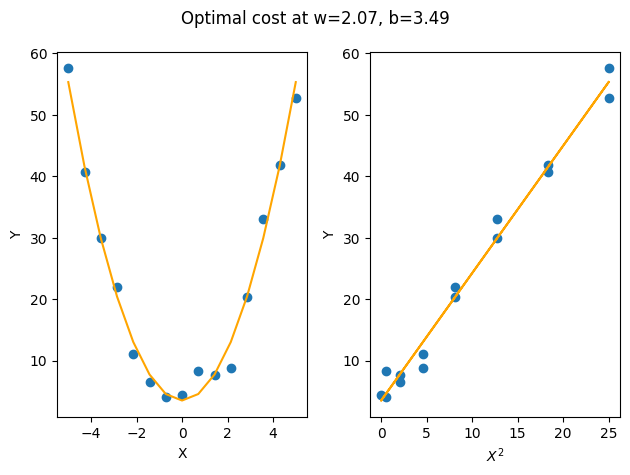

In [11]:
best_w, best_b = argminJ(X**2, Y)

title = f'Optimal cost at w={best_w :.2f}, b={best_b :.2f}'

y_hat = best_w * X ** 2 + best_b

fig, axes = plt.subplots(1, 2)
ax1, ax2 = axes

fig.suptitle(title)

ax1.scatter(X, Y)
ax1.plot(X, y_hat, c='orange')
ax1.set_ylabel('Y')
ax1.set_xlabel('X')

ax2.scatter(X**2, Y)
ax2.plot(X**2, y_hat, c='orange')
ax2.set_ylabel('Y')
ax2.set_xlabel(r'$X^2$')

plt.tight_layout()

# Locally Weighted Regression

## Parameteric vs Non-Parametric Learning Algorithms

In prarametric learning algorithms we attempt to fit a fixed set of **parameters** to our data. In the case of a univariate linear regression there parameters were $w$ and $b$. In the case of multiple linear regression it would we $(x_1, x_2, \dots, x_n)$ where $n$ is the number of features in the data (fixed number). As we add more samples to our data (increase $m$), the number of parameters does not change.

On the other hand, with non-parametric learning algorithms the number of parameters is allowed to grow as the number of samples increases (as $m$ increases).

Locally Weighted Regression (LWR) is as example of a non-parameteric learning algorithm. In LWR the number of parameters is allowed to grow linearly as the number of samples increases. When asked to maked a prediction for a particular input $x'$, LWR will look at sample data points near $x'$ to choose a model and return that model's output $\hat{y}'$.

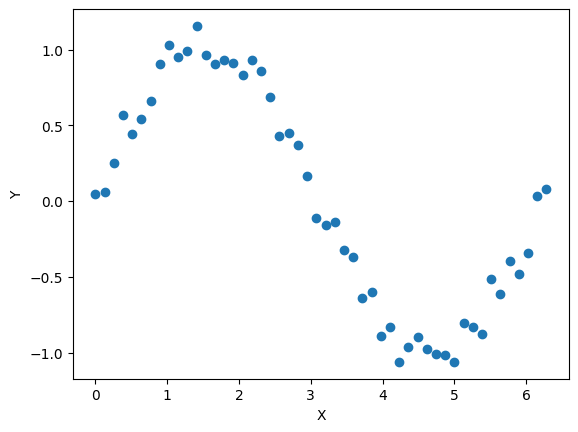

In [24]:
m = 50
noise_sd = 0.1

# X = [0, 2pi]
X = np.linspace(0, 2*np.pi)
noise = rn.normal(0, noise_sd, m)
Y = np.sin(X) + noise

fig, ax = plt.subplots()

ax.scatter(X, Y)
ax.set_ylabel('Y')
ax.set_xlabel('X');

Below we look at a simplified approach of how the LWR algorithm aggregates datapoints near where it needs to predict outputs.

In [25]:
value_dict = dict(zip(X, Y))

def LWR(x, k, ax):
    """
    Locally Weighted Regression function
    
    x: value to predict y for
    k: number of nearest datapoints to look at
    ax: axes for model visualization
    """
    
    k_nearest = np.array(sorted(X, key=lambda i: np.abs(x-i))[:k])
    k_nearest_y = np.array([value_dict[i] for i in k_nearest])
    
    w, b = argminJ(k_nearest, k_nearest_y)
    
    y_hat = w*X + b
    
    ax.set_title(f'w={w :.2f}, b={b :.2f}')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')
    
    ax.scatter(X, Y) # plot data
    ax.scatter(k_nearest, k_nearest_y, c='orange') # plot local sample datapoints
    ax.plot(X, y_hat, c='orange') # plot model
    ax.scatter(x, w * x + b, c='red') # plot predicted data point

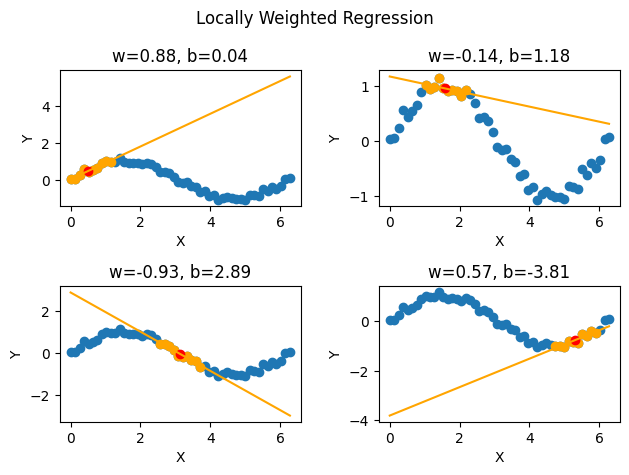

In [26]:
k = 10 # look at nearest 10 datapoints
test_Xs = [0.5, np.pi/2, np.pi, 5.3] # inputs to test

fig, axes = plt.subplots(2, 2)

for x, ax in zip(test_Xs, axes.flatten()):
    LWR(x, k, ax)

plt.suptitle('Locally Weighted Regression')
plt.tight_layout()

In the above figure shows how LWR uses different models $w$ and $b$ to predict values in certain regions. Although doing so is computaionally expensive for larger sets of data, it does provide an accurate alternative to polynomial regression for smaller datasets.